# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [16]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### 시드(seed) 고정  

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [3]:
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

train.head(5)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 계절 피쳐 추가

In [4]:


def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'


train['계절'] = train['월'].apply(get_season)

#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [5]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']



In [6]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,계절
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,가을
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,가을
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,여름
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,봄
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,가을


#### train , validation data 나누기

In [7]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### 라벨인코딩(Label Encoding) 

In [8]:

ordinal_features = ['요일', '범죄발생지','계절']

for feature in ordinal_features:
    le = LabelEncoder()
    
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    X_val[feature] = le.transform(X_val[feature])



In [9]:
X_tr.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,계절
45887,9,2,12,1140,31.0,1.792490,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,0
64986,3,5,6,738,27.0,0.771010,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2
12545,5,1,3,1749,46.0,1.962962,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
19141,6,0,10,1749,46.0,2.356086,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,3
70002,3,5,7,737,27.0,0.882831,0.0,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2


#### 모델 정의

In [11]:
model = DecisionTreeClassifier(random_state=42)

#### 모델 학습

In [12]:
model.fit(X_tr, Y_tr)

DecisionTreeClassifier(random_state=42)

#### 예측

In [13]:
pred = model.predict(X_val)

정확도 : 0.4409
정말도 : 0.4421
Recall: 0.4409
F1 Score: 0.4409
Confusion Matrix:
[[3659 1760 1872]
 [1758 2225 1152]
 [1766 1131 1559]]


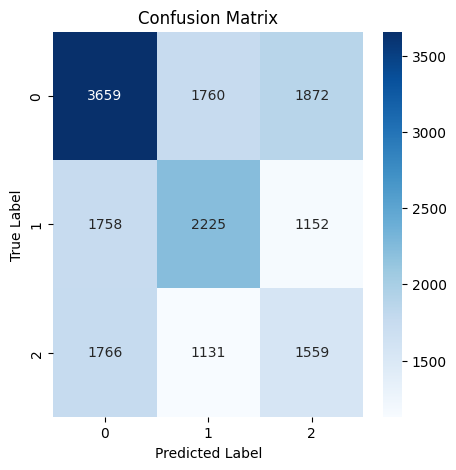

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted') 
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='micro')  
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# 계절 파생 변수 생성 -> 성능 떨어진 것 확인